In [1]:
import matplotlib.pyplot as plt
import numpy as np
from logistic_GD import Logistic_Regression as gd
from logistic_SGD import Logistic_Regression as sgd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import time

In [2]:
# loading dataset
data = load_breast_cancer()
X,y = data.data, data.target
n,m = X.shape
print(f'Number of features : {m}')

Number of features : 30


In [3]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [4]:
# fitting
param_ini = np.zeros((m+1,),float)

# fitting the model using 'Gradient Descent' method
model_1 = gd()
n_iter_1 = 10**5
rate_1 = 0.05
begin = time.time()
model_1.fit(X_train,y_train,param_ini,learning_rate=rate_1, max_iter=n_iter_1)
end = time.time()
time_1 = end - begin

# fitting the model using 'Stochastic Gradient Descent' method
model_2 = sgd()
n_iter_2 = int(n_iter_1 / m)        # ensure that both the models get the same number of total loop iteraions
rate_2 = 0.05
begin = time.time()
model_2.fit(X_train,y_train,param_ini,learning_rate=rate_2, max_iter=n_iter_2)
end = time.time()
time_2 = end - begin

print('Training duration for GD :',time_1)
print('Training duration for SGD :',time_2)

Training duration for GD : 5.582528352737427
Training duration for SGD : 6.424290180206299


In [5]:
# getting predictions
y_pred_1 = model_1.pred(X_test)
y_pred_2 = model_2.pred(X_test)

In [6]:
# printing the parameters
params_1 = model_1.get_params()
params_2 = model_2.get_params()
print(f'Parameters (GD method) :\n\n{params_1}')
print(f'\nParameters (SGD method) :\n\n{params_2}')

Parameters (GD method) :

[ 9.9522034   1.12160926 -2.87005309  0.84361069 -1.85829404  5.34330282
  4.84121865 -5.93365247 -8.50558244  2.67257926  6.99049039 -2.5120539
  0.86424038 -2.08997111 -2.17587333 -1.15528966  3.63471254  1.41156991
  2.08736243 -1.45345293  2.68905712 -2.64253677 -6.89051778 -2.26944297
 -4.39508504 -1.1995492   0.53456295 -5.61770813 -9.63651147 -7.23413546
  1.01832748]

Parameters (SGD method) :

[ 16.70248156   3.14946225  -2.65733759   2.64177819  -1.85725558
   8.25180657   9.77513595  -8.5942776  -13.51725831   5.3668581
  10.58729786  -3.39495672   2.75114692  -2.75749932  -3.4676826
  -4.65171318   4.88959362   3.0011791    4.56427654  -3.32544958
   4.56679393  -4.71585968 -13.26823262  -3.89216161  -7.63495758
  -5.48799147   2.98119039  -6.84934979 -16.01620922 -15.3697422
   1.79797077]


In [7]:
# accuracy score
accuracy_1 = model_1.accuracy(X_test,y_test)
accuracy_2 = model_2.accuracy(X_test,y_test)
print(f'Accuracy (GD) : {accuracy_1:.03f}')
print(f'\nAccuracy (SGD) : {accuracy_2:.03f}')

Accuracy (GD) : 0.969

Accuracy (SGD) : 0.963


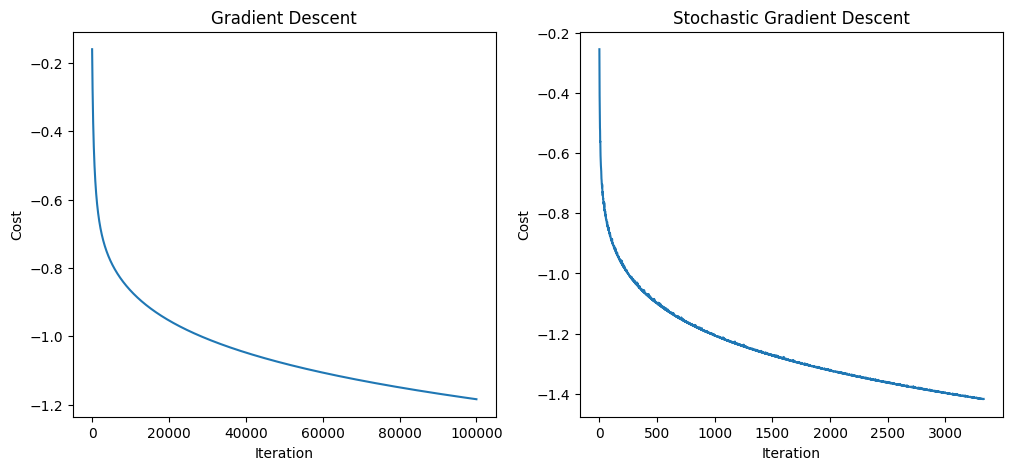

In [8]:
# visualizing the cost evolution
cost_1 = model_1.get_cost()
cost_2 = model_2.get_cost()

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.plot(np.arange(n_iter_1),np.log10(cost_1))
plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.subplot(1,2,2)
plt.plot(np.arange(n_iter_2),np.log10(cost_2))
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.show()